In [2]:
import pandas as pd 
import numpy as np 
import pylab as plt

In [3]:
data = pd.read_csv("out.csv", index_col=0)
data.head(n=3)

,q_group,totalTime,graph_E-q_0,type_E-q_0,E-q_0,correct_E-q_0,trueAnswer_E-q_0,editDist_E-q_0,time_E-q_0,hoverCount_E-q_0,...,likert_S_lq-8,geom_order,feedback-fq5,feedback-fq6,feedback-fq7,feedback-fq8,feedback-fq9,feedback-fq1,feedback-fq2,feedback-fq4
p_325,0,25.200000,e_group_0,T1,option-2,1,option-2,1.000000,15377,10,...,4,"H,S,E",3,2.0,1,2,3,hovering over nodes to see where to go next wh...,no,i hated the first style. the globe and flat st...
p_328,1,32.200000,e_group_1,T5,option-2,1,option-2,1.000000,53538,2,...,3,"E,S,H",5,1.0,2,2,2,The hover ability was most valuable for all th...,No,The second visualization technique was particu...
p_329,2,24.533333,e_group_1,T6,option-3,0,option-2,0.666667,6331,5,...,1,"H,E,S",4,1.0,1,4,2,NaN,NaN,NaN


In [61]:
for geom in "EHS":
    for q in range(18):
        lab = f"effort_{geom}-q{q}"
        data[lab] = data[[col for col in data.columns if f"panCount_{geom}-q_{q}" in col or f"zoomCount_{geom}-q_{q}" in col or f"dblclickCount_{geom}-q_{q}" in col]].sum(axis=1)

In [105]:
analysis_type = "correct"

In [106]:
e_cols = [col for col in data.columns if f"{analysis_type}_E" in col]
h_cols = [col for col in data.columns if f"{analysis_type}_H" in col]
s_cols = [col for col in data.columns if f"{analysis_type}_S" in col]

In [107]:
e_times = data[e_cols].mean(axis=1)
h_times = data[h_cols].mean(axis=1)
s_times = data[s_cols].mean(axis=1)

H2 = pd.DataFrame()
H2["E"] = e_times #/ 1000
H2["H"] = h_times #/ 1000
H2["S"] = s_times #/ 1000

In [108]:
test = data[[col for col in data.columns if "panCount_E-q_0" in col or "zoomCount_E-q_0" in col or "dblclickCount_E-q_0" in col]].sum(axis=1)

In [109]:
def get_df_analysis(analysis_type):
    e_cols = [col for col in data.columns if f"{analysis_type}_E" in col]
    h_cols = [col for col in data.columns if f"{analysis_type}_H" in col]
    s_cols = [col for col in data.columns if f"{analysis_type}_S" in col]

    e_times = data[e_cols].mean(axis=1)
    h_times = data[h_cols].mean(axis=1)
    s_times = data[s_cols].mean(axis=1)

    H2 = pd.DataFrame()
    H2["E"] = e_times 
    H2["H"] = h_times 
    H2["S"] = s_times 
    return H2

In [110]:
vals = list()
for index, row in H2.iterrows():
    for col in H2.columns:
        vals.append([row[col], index, col])
pd.DataFrame(vals, columns=["values", "participants", "groups"]).to_csv("hypotheses/H2.csv",index=False)

In [111]:
plt.boxplot(H2.to_numpy(), labels=["E", "H", "S"])
plt.suptitle(f"H12")
plt.savefig(f"figures/H2.png")
plt.clf()

<Figure size 640x480 with 0 Axes>

In [112]:
import scipy.stats as st

In [122]:
H2 = get_df_analysis("correct")
H2.head()

In [123]:
labels = list("SHE")
means = [H2[g].mean() for g in labels]
CI = [st.t.interval(confidence=0.9, df=len(H2[g])-1, loc=H2[g].mean(), scale=st.sem(H2[g])) for g in labels ]


['S', 'H', 'E']


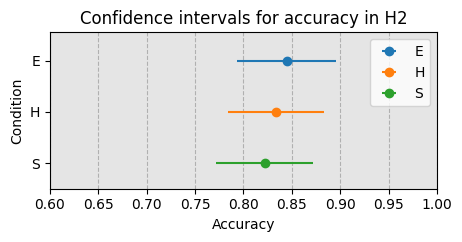

In [131]:
colors = ["tab:blue", "tab:orange", "tab:green"][::-1]
fig, ax = plt.subplots()
error_plots = list()
for i,(mean, (low, high)) in enumerate(zip(means, CI)):
    
    err = ax.errorbar(mean, [i/10], xerr=[abs(low - mean)], fmt='o',color=colors[i%3])
    error_plots.append(err)

xmin = 0.6
xmax = 1.0
ax.set_xlim(xmin, xmax)
ax.legend(error_plots[::-1],["E", "H", "S"],loc="upper right")

print(labels)
ax.set_yticks([i / 10 for i in range(3)], labels=labels)
ax.set_ylim(-0.05, 2/10 + 0.055)
# ax.hlines([0-0.05, 0.25, (5/10 + 0.05)], xmin, xmax, colors="black")
ax.grid(True,axis='x',linestyle='--')

ax.set_xlabel("Accuracy")
ax.set_ylabel("Condition")
ax.set_title("Confidence intervals for accuracy in H2")
fig.set_size_inches(5,2.3)
ax.axhspan(-0.05,0.35,facecolor="grey",alpha=0.2)


# ax2 = ax.twinx()
# ax2.set_ylim(-0.05, 8/10 + 0.055)
# ax2.set_yticks([i / 10 for i in range(1,9,3)], ["H1c", "H1b", "H1a"])

fig.subplots_adjust(bottom=0.2)
fig.savefig("figures/H2vis_acc.pdf")

In [125]:
H2['E'].sum()

24.499999999999996

In [126]:
hover = get_df_analysis("hoverCount")
pan   = get_df_analysis("panCount")
zoom  = get_df_analysis("zoomCount")
dblclk = get_df_analysis("dblclickCount")
rest   = get_df_analysis("resetCount")

In [127]:
interactions = [hover, pan, zoom, dblclk, rest]

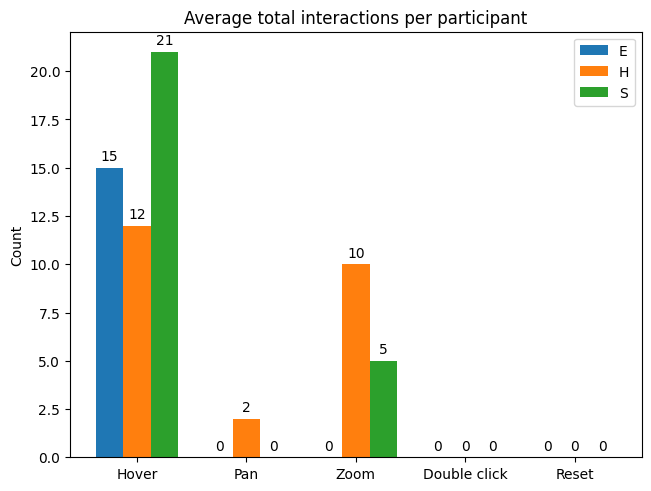

In [128]:

species = ("Hover", "Pan", "Zoom", "Double click", "Reset")
penguin_means = {
    'E': [int(d["E"].mean()) for d in interactions],
    'H': [int(d["H"].mean()) for d in interactions],
    'S': [int(d["S"].mean()) for d in interactions],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Average total interactions per participant')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right')
# ax.set_ylim(0, 250)

plt.savefig("figures/interactions.pdf")